# Introduction

*   This notebook implements the "TD(0)" algorithm for the "Random Walk" environment. The environment is explained in Example 6.2 on page 125 in Section 6.2 of the book "Reinforcement Learning: An Introduction" by Richard S. Sutton and Andrew G. Barto (second edition).



*   The algorithm and the related text is copied and pasted from Section 6.1 of the book "Reinforcement Learning: An Introduction" by Richard S. Sutton and Andrew G. Barto (second edition).



*   You can download the book [here](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf).

# TD Prediction

Whereas Monte Carlo methods must wait until the end of the episode to determine the increment to $V(S_{t})$ (only then is $G_{t}$ known), TD methods need to wait only until the next time step. At time ${t+1}$ they immediately form a target and make a useful update using the observed reward $R_{t+1}$ and the estimate $V(S_{t+1})$. The simplest TD method makes the update

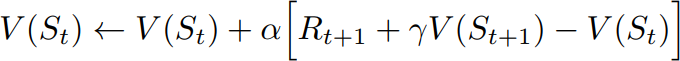

immediately on transition to $S_{t+1}$ and receiving $R_{t+1}$. In effect, the target for the Monte Carlo update is $G_{t}$, whereas the target for the TD update is $R_{t+1} + \gamma V(S_{t+1})$. This TD method is called *TD(0)*, or *one-step TD*, because it is a special case of the TD($\lambda$) and *n*-step TD methods.

**Algorithm**

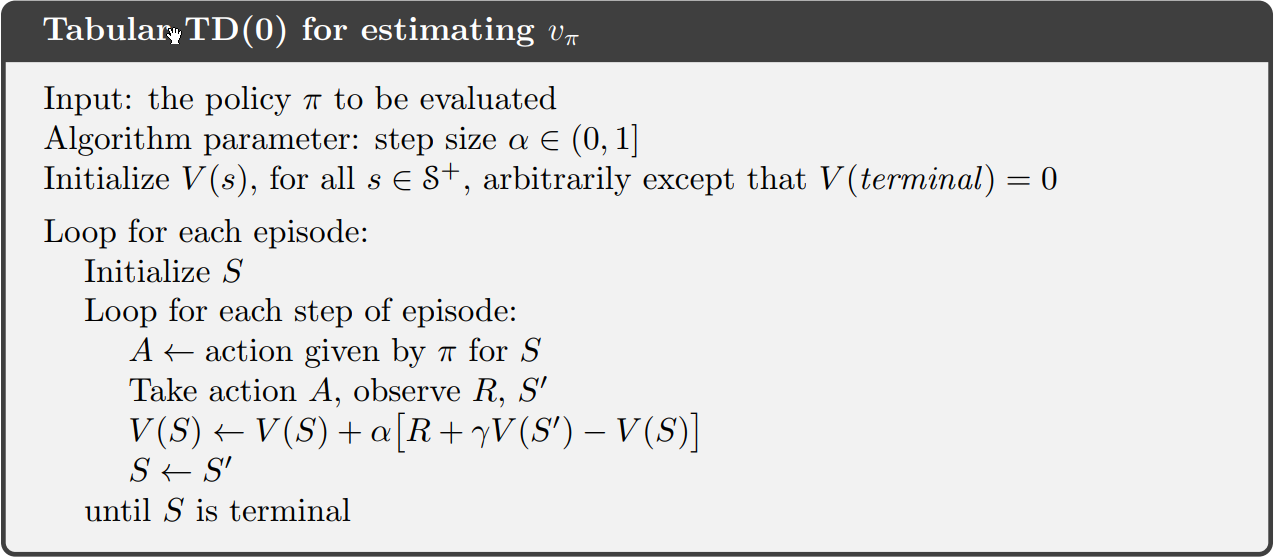

# Python Implementation

**Import Packages**

In [ ]:
import numpy as np
from gym import Env
from gym.spaces import Discrete
import matplotlib.pyplot as plt

**Random Walk Environment**

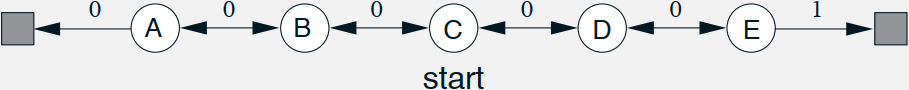

In [ ]:
class RandomWalk(Env):

    def __init__(self):

        self.action_space = Discrete(2)  # 0: go left | 1: go right
        self.observation_space = [i for i in range(7)]  # Terminal <-- A <--> B <--> C <--> D <--> E --> Terminal
        self.initial_state = 3
        self.state = None

    def step(self, action):
        """
        Take action and observe the reward and the next state.

        Actions:
            Num   Action
            0     Go left
            1     Go right

        Rewards:
            +1 when terminating on the extreme right
             0 otherwise
        """

        if action == 0:
            self.state -= 1
            if self.state == min(self.observation_space):
                reward = 0
                done = True
            else:
                reward = 0
                done = False

        elif action == 1:
            self.state += 1
            if self.state == max(self.observation_space):
                reward = 1
                done = True
            else:
                reward = 0
                done = False

        info = {}

        return self.state, reward, done, info

    def render(self):
        pass

    def reset(self):
        """
        Reset the environment for a new episode.
        """

        self.state = self.initial_state
        return self.state

**TD(0) Agent**

In [ ]:
class Agent:

    def __init__(self, alpha, gamma, state_space, action_space):

        self.alpha = alpha  # step-size parameter
        self.gamma = gamma  # discount-rate parameter (discount factor)
        self.state_space = state_space
        self.action_space = action_space

        self.V = {}
        for s in self.state_space:
            self.V[s] = 0

    def policy(self, state):
        """
        Implement the random action selection policy for the "Random Walk" environment.
        """

        _ = state
        action = self.action_space.sample()
        return action

    def update_values(self, state, reward, state_):
        """
        Update the state-value estimates.
        """

        delta = reward + self.gamma * self.V[state_] - self.V[state]  # TD error
        self.V[state] += self.alpha * delta

**Main Body**

In [ ]:
def calculate_rmse(actual, estimated):
    a = np.array(actual)
    b = np.array(estimated)
    mse = ((a - b)**2).mean()
    return np.sqrt(mse)

In [ ]:
env = RandomWalk()
action_space = env.action_space  # Discrete(2) = [0, 1]
state_space = env.observation_space

alpha = 0.05  # step-size parameter
gamma = 1.0  # discount-rate parameter (discount factor)

agent = Agent(alpha, gamma, state_space, action_space)

episodes = 100
true_state_values = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 0]
root_mean_squared_error = []

for episode in range(1, episodes + 1):

    state = env.reset()
    done = False

    steps = 0
    # actions = []

    while not done:

        # env.render()
        action = agent.policy(state)
        state_, reward, done, info = env.step(action)
        agent.update_values(state, reward, state_)
        state = state_

        steps += 1
        # actions.append(action)

    root_mean_squared_error.append(calculate_rmse(true_state_values, list(agent.V.values())))

    if episode % 10 == 0:
        print(f"============ Episode: {episode} ============")
        print(f"Steps: {steps}")
        # print(f"Actions: {actions}")

# env.close()

**Plot**

In [ ]:
x_axis = [i for i in range(1, episodes + 1)]
y_axis = root_mean_squared_error

plt.figure(figsize=(12, 6), dpi=100)

plt.title("RMSE per Episode for State-Value Estimates")
plt.xlabel("Episode")
plt.ylabel("RMSE")

plt.plot(x_axis, y_axis)
plt.grid()
plt.show()

**Simulation Results**

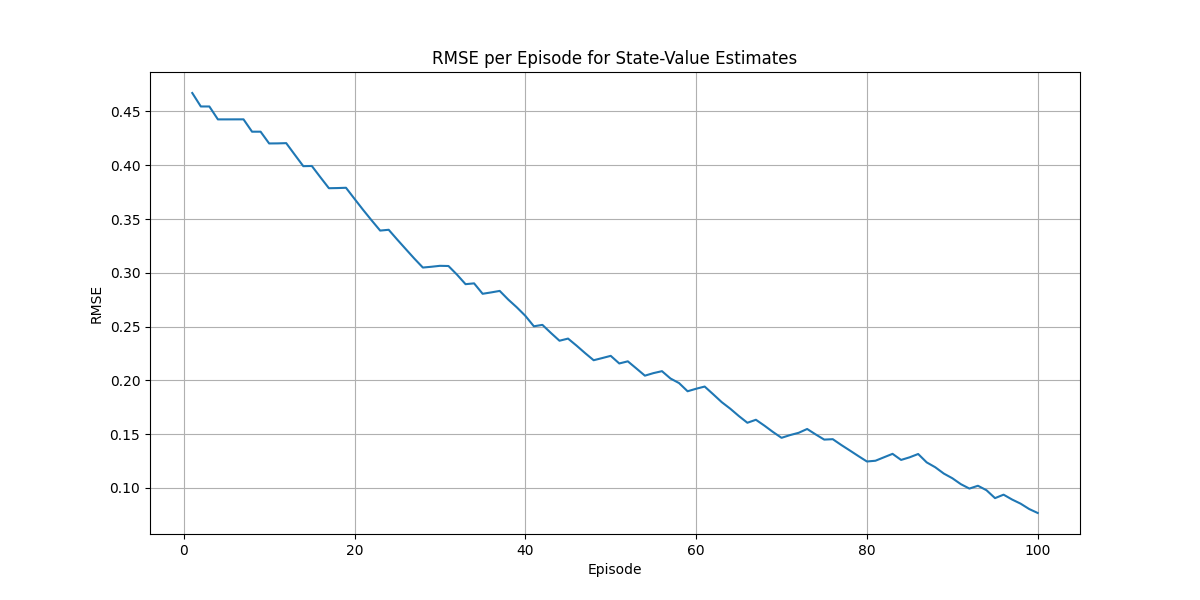